# Report

## Comparative Report between British Airways and competing airlines of 3 BA Most Profitable Routes. 

### Introduction

In this analysis, we aim to compare British Airways (BA) customer service performance based on the metric available in Skystrax website. The identified main competitors for these routes are American Airlines, Emirati Airline, and Cathay Pacific Airlines. To ensure a uniform analysis, I decide to only take into account the economy class reviews.

### Identified Metrics

Two key metrics will be considered in this comparative analysis:

1. **Customer Service Comments and Quantifiable Rating:**
   - We will analyze customer reviews and ratings related to customer service. This will involve considering both qualitative comments and quantifiable ratings provided by passengers.

2. **Pricing:**
   - The pricing strategy of each airline will be assessed. This includes examining the affordability and value for money perceived by customers.

### Review Limitations and Caveats

It's crucial to acknowledge and address potential biases and limitations in the review data:

1. **Negativity Bias:**
   - Recognize that dissatisfied customers may be more inclined to leave reviews. This negativity bias could skew the representation of the overall customer experience. To mitigate this, we will attempt to extract insights from a diverse range of reviews.

2. **Incomplete Representation:**
   - Acknowledge that online reviews may not provide a comprehensive view of the passenger experience. Some satisfied customers may not leave reviews, leading to an incomplete representation. We will attempt to account for this limitation by considering multiple sources and trends over time.

### Analysis Approach

To conduct the analysis, we will:

1. **Collect Data:**
   - Gather customer reviews and ratings for each airline on the specified routes, focusing on the years 2022-2023.

2. **Segmentation:**
   - Segment the data based on airlines, routes, and travel years to facilitate a detailed and targeted analysis.

3. **Quantitative Analysis:**
   - Conduct a quantitative analysis of the quantifiable ratings to identify trends and patterns in customer satisfaction.

4. **NLP Analysis:**
   - Utilize Natural Language Processing (NLP) techniques, including stemming, to analyze and make sense of qualitative comments. This will help extract key themes and sentiments from customer feedback.

5. **Correlation Analysis:**
   - Explore the correlation between quantifiable ratings and the sentiments expressed in comments. This will provide a deeper understanding of how numerical ratings align with qualitative feedback, representing the comments with the quantifiable metrics

By approaching the analysis systematically and considering potential biases, we aim to provide a comprehensive and insightful comparison of British Airways and its competitors on the specified routes.


### **Step 1 & 2**

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

First, we need to scrape British Airways review data and their comment posted in the Skystrax platform.
the data will be divided into:
1. Name (string)
2. Type of seat flown (categorical)
3. Routes taken (string)
4. Date flown (datetime)
5. Comment (string)

In [113]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 500

df = pd.DataFrame()

for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    # Find all <td> tags with class "review-rating-header cabin_flown"
    td_tags_name=parsed_content.find_all("span", itemprop="name")
    td_tags_cabin_flown = parsed_content.find_all('td', class_='review-rating-header cabin_flown')
    td_tags_route=parsed_content.find_all("td", class_="review-rating-header route")
    td_tags_traveller=parsed_content.find_all("td", class_="review-rating-header type_of_traveller")
    td_tags_date=parsed_content.find_all("td", class_="review-rating-header date_flown")
    td_text_context=parsed_content.find_all("div", {"class": "text_content"})
    td_tags_recommend = parsed_content.find_all("td", class_="review-rating-header recommended")
    
    for index, tag_name in enumerate(td_tags_name):
        name=tag_name.text.strip()
        df.at[index, "Name"]= name

    for index, td_element in enumerate(td_tags_cabin_flown):
        # Handle td_tags_cabin_flown
        seat_type_td_tag = td_element.find_next_sibling('td', class_='review-value')
        seat_type = seat_type_td_tag.text.strip()
        df.at[index, "Seat Type"] = seat_type

    for index, td_element in enumerate(td_tags_route):
        # Handle td_tags_route
        route_td_tag = td_element.find_next_sibling("td", class_="review-value")
        route = route_td_tag.text.strip()
        df.at[index, "Route"] = route

    for index, td_element in enumerate(td_tags_traveller):
        traveller_td_tag = td_element.find_next_sibling("td", class_="review-value")
        traveller_type = traveller_td_tag.text.strip()
        df.at[index, "Type of Traveller"] = traveller_type

    for index, td_element in enumerate(td_tags_date):
        date_td_tag = td_element.find_next_sibling("td", class_="review-value")
        date_flown = date_td_tag.text.strip()
        df.at[index, "Date flown"] = date_flown
            
    for index, td_elem in enumerate (td_tags_recommend):
        recommendation_val_elem = td_elem.find_next_sibling("td", class_="review-value")
        if "rating-no" in recommendation_val_elem["class"]:
            df.at[index, "Reccomend"]= True
        else:
            df.at[index, "Reccomend"]= False

    
    for index, text in enumerate(td_text_context):
        df.at[index, "Comment"] = text.get_text()
            

    

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping completed.


In [85]:
b = pd.read_csv("scrape_airtrax.csv")
c = pd.read_csv("new_airtrax.csv")

combine = pd.concat([b, c])
combine.drop_duplicates()
df=combine

## Data Cleaning

In [86]:
#change flight wording from - to " to "
i=0
lst=[]
for route in df["Route"]:
    s=""
    for r in route:
        if r == "-":
            r= " to "
        s+=r
    lst.append(s)
df["Route"]=lst

#split flight into Departure and Destination 
s=df["Route"]
depart=[]
destin=[]
for route in s:
    r=route.split(" to ")
    depart.append(r[0])
    destin.append(r[-1])
df["Departure"]=depart
df["Destination"]=destin  


In [87]:
#format the datetime from string into an actual datetime
df["Date flown"] = pd.to_datetime(df["Date flown"], format="%B %Y")
df.sort_values(by="Date flown", ascending=True)
new_column_order = ['Name', 'Seat Type', 'Type of Traveller', 'Date flown', 'Reccomend', 'Departure', 'Destination', 'Comment']
df = df[new_column_order]


In [ ]:
df["Destination"]=df["Destination"].replace("London", "Heathrow")
df["Destination"]= df["Destination"].replace("London Heathrow", "Heathrow")
df["Destination"]= df["Destination"].replace("LHR", "Heathrow")

In [ ]:
df["Departure"]=df["Departure"].replace("London", "Heathrow")
df["Departure"]= df["Departure"].replace("London Heathrow", "Heathrow")
df["Departure"]= df["Departure"].replace("London Gatwick", "Gatwick")
df["Departure"]= df["Departure"].replace("GLA", "Glasgow")

# Quantative Analysis
We need to do some simple quantitive analysis based on the integer data we already have and visualize it using graphs appropriate for the situation.

In [90]:
import matplotlib.pyplot as plt

In [91]:
df["Name"].value_counts()

A Hickling        6
W Benson          6
C Denson          6
Sander van Kan    6
C Cutts           5
                 ..
Thompson Alan     2
J Robertson       2
R Thompson        2
James Little      2
Luis Starr        2
Name: Name, Length: 171, dtype: int64

In [92]:
#count how many review for the month & year they flown
df["Date flown"].value_counts()

2015-08-01    136
2015-07-01    106
2015-06-01     76
2015-05-01     30
2015-09-01     28
2015-04-01      6
2014-09-01      4
2014-11-01      4
2014-07-01      2
2014-08-01      2
2015-03-01      2
2014-12-01      2
2014-10-01      2
Name: Date flown, dtype: int64

In [93]:
#count how many reviewer reccomend British Airline
df["Reccomend"].value_counts()

False    243
True     157
Name: Reccomend, dtype: int64

#### Reccomended and Date Flown
Analyze the reccomendation and compared it with when the reviewer take the flight.
By doing this, we can recognize in which month reviewer travelled the most for 13 months between 2015-2016. We can see the correlation between the number of traveller with good review or reccomended and bad review or not reccomended.

In [94]:
group_reccom_date = df.groupby(pd.Grouper(key="Date flown"))["Reccomend"].value_counts()

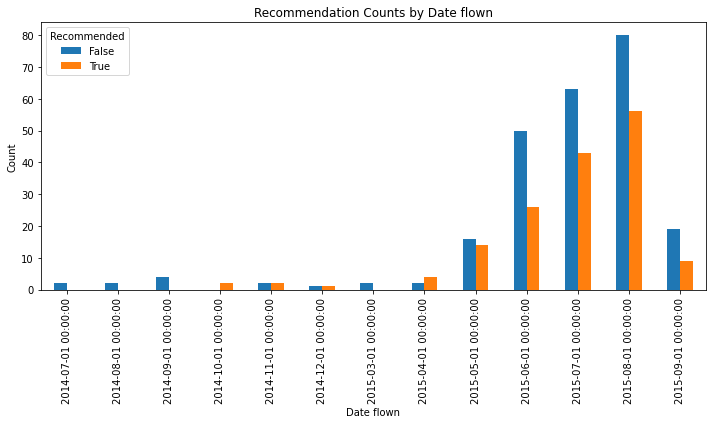

In [95]:
group_reccom_date = group_reccom_date.reset_index(name='count')
# Pivot the DataFrame
pivot_df = group_reccom_date.pivot(index='Date flown', columns='Reccomend', values='count').fillna(0)

# Plotting
pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6))



# Adding labels and title
plt.xlabel('Date flown')
plt.ylabel('Count')
plt.title('Recommendation Counts by Date flown')

# Show plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Recommended')
plt.show()

We can see from this bar plot we can see that in the year 2014-2015, the amount of passenger and review start to ramp up in May 2015 and peaking at August 2015.The more reviewer don't reccomend British Airways, this may can indicate as quantity increased, the level of service decrease, ending up with amount of not reccomended increase sharply in June 2015, eventhough the airline can pick up the quality but the number of reviewer don't reccomended stay more than the reccomend.

#### Seat Type and Type of Traveller

In [96]:
df["Seat Type"].value_counts()

Economy Class      190
Business Class     146
Premium Economy     38
First Class         26
Name: Seat Type, dtype: int64

In [97]:
df["Type of Traveller"].value_counts()

Couple Leisure    110
Solo Leisure      108
Business          102
Family Leisure     80
Name: Type of Traveller, dtype: int64

In [98]:
group= df.groupby(['Type of Traveller', 'Seat Type']).size()

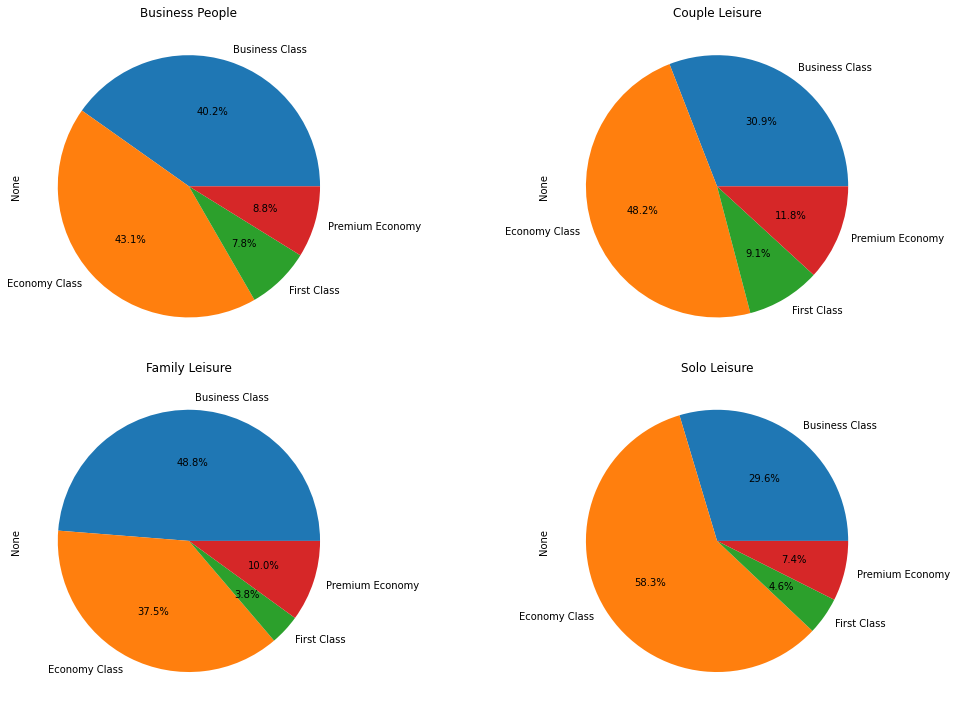

Type of Traveller  Seat Type      
Business           Business Class     41
                   Economy Class      44
                   First Class         8
                   Premium Economy     9
Couple Leisure     Business Class     34
                   Economy Class      53
                   First Class        10
                   Premium Economy    13
Family Leisure     Business Class     39
                   Economy Class      30
                   First Class         3
                   Premium Economy     8
Solo Leisure       Business Class     32
                   Economy Class      63
                   First Class         5
                   Premium Economy     8
dtype: int64

In [99]:
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Business People pie
group["Business"].plot(kind="pie", autopct='%1.1f%%', ax=axes[0, 0])
axes[0, 0].set_title("Business People")

# Couple Leisure pie
group["Couple Leisure"].plot(kind="pie", autopct='%1.1f%%', ax=axes[0, 1])
axes[0, 1].set_title("Couple Leisure")

# Family Leisure pie
group["Family Leisure"].plot(kind="pie", autopct='%1.1f%%', ax=axes[1, 0])
axes[1, 0].set_title("Family Leisure")

# Solo Leisure pie
group["Solo Leisure"].plot(kind="pie", autopct='%1.1f%%', ax=axes[1, 1])
axes[1, 1].set_title("Solo Leisure")

plt.tight_layout()
plt.show()

group


From this analysis, we can see that Family leisure Leisure and Business people make dominant number of people leaving a reviewer, both of this subclass of people are also more likely to get the pricier service (other than Economy class) and business class represent big amount of their subclass. On the other hand, Solo leisure and Couple leisure people are way more likely to use frugal economy class. 

### Seat Type and Reccomendation

In [100]:
seat_type=df["Seat Type"].value_counts()

In [101]:
df["Reccomend"].value_counts()

False    243
True     157
Name: Reccomend, dtype: int64

In [102]:
recc_seat= df.groupby(['Seat Type', 'Reccomend']).size()
recc_seat

Seat Type        Reccomend
Business Class   False         94
                 True          52
Economy Class    False        112
                 True          78
First Class      False         16
                 True          10
Premium Economy  False         21
                 True          17
dtype: int64

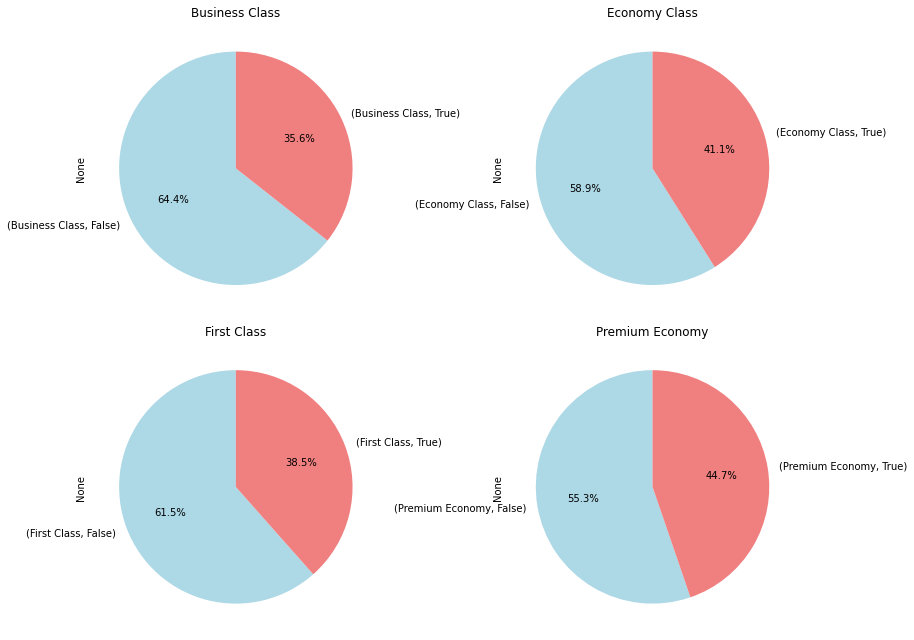

In [103]:
import matplotlib.pyplot as plt


# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

# Plot a pie chart in each subplot
for i, (seat_type, data) in enumerate(recc_seat.groupby('Seat Type')):
    ax = axes[i]
    data.plot(kind='pie', ax=ax, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
    ax.set_title(seat_type)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()





From here we can say there is a lot more dissatisfaction of people using Business class than people using Economy class, this is not a good sign when Business class is being designed to have better services with higher prices means that the product we deliver worth less compared to the price tag. This also happens compared with First class passenger. 

### Departure, Destination, and Reccomend
We aim to visualize the departure areas of reviewers, their respective destinations, and the number of reviewers who recommend British Airlines based on their departure spot. This visualization will provide insight into the most common departure spots and destinations, as well as the likelihood of recommending British Airlines from each departure area.

In [104]:
df["Departure"].value_counts()

Heathrow    97
LHR         76
Gatwick     22
Glasgow     10
Sydney       8
            ..
Verona       2
Miami        2
Bologna      2
Istambul     2
Rome         1
Name: Departure, Length: 76, dtype: int64

In [105]:
df["Destination"].value_counts()

Heathrow          113
London Gatwick      6
Vienna              6
Singapore           5
Milan via LHR       4
                 ... 
IST                 2
Kuala lumpur        2
VCE                 2
BOM via LHR         1
AMS                 1
Name: Destination, Length: 123, dtype: int64

From this we can say that significant portion of reviewer come from Heathrow and significant portion of reviewer going to Heathrow from other places internationally. Interestingly, we can see that there is more area in the Destination than the Departure area. 
&nbsp;

Now we going to separate the data to reccomend (yes , no) and plot the departure point and destination point for each of these sub dataset. From this, we can see which route have underperforming service or inconsistent service based on reviewers decision to reccomend this airline or not.

In [110]:
yes = df[(df["Reccomend"] == True)]
yes

,Name,Seat Type,Type of Traveller,Date flown,Reccomend,Departure,Destination,Comment
1,Livingston Alan,Premium Economy,Couple Leisure,2015-08-01,True,Glasgow,New York via LHR,I flew Glasgow-Gatwick-Vegas-Gatwick-Glasgow. ...
3,Chris Willwtt,First Class,Couple Leisure,2015-08-01,True,LHR,ARN,LHR-YVR-LHR. Flew in in First on very shabby 7...
12,Ryan Thomas,Economy Class,Couple Leisure,2015-07-01,True,Toronto,Heathrow,Travelled from OZ to watch start of TDF in Lee...
15,Jeff Smith,Business Class,Family Leisure,2015-08-01,True,Miami,Heathrow,Flew LHR to Larnaca and return 22nd April and ...
16,Tom Adamson,First Class,Business,2015-06-01,True,Heathrow,Geneva,"LHR-SEA in ""first"" class. The experience was r..."
...,...,...,...,...,...,...,...,...
188,Storey John,Business Class,Family Leisure,2015-09-01,True,Heathrow,Tokyo,MAD to LCY Business. Great lounge at Madrid fl...
192,D Day,Business Class,Family Leisure,2015-09-01,True,Heathrow,Paris,LGW-BGI-LGW Club World R/T. Old careworn B777-...
193,Senden Roswitha,Economy Class,Solo Leisure,2015-08-01,True,Heathrow,Bangkok,Very disappointed with my flight back from Mun...
194,Jackie Craig,Economy Class,Solo Leisure,2015-08-01,True,Las Vegas,Heathrow,I flew with British Airways with my mother fro...
